In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
state_dataset = pd.read_csv("datasets/preprocessed_counties_data.csv")

In [55]:
state_dataset.head()

,type,flavor,state,year,index
0,1,1,1,1975,200.74
1,1,1,1,1976,295.63
2,1,1,1,1977,313.37
3,1,1,1,1978,344.02
4,1,1,1,1979,379.99


In [57]:
x = state_dataset[['type', 'flavor', 'state', 'year']]
y = state_dataset['index']

In [118]:
poly = PolynomialFeatures(degree=3)
poly.fit(x)
poly_features = poly.transform(x)
clf = LinearRegression()
clf.fit(poly_features, y)

LinearRegression()

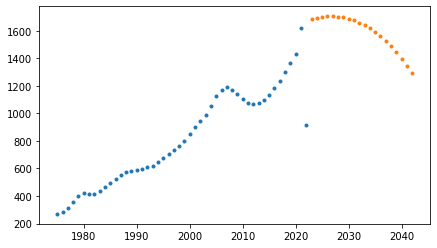

In [119]:
trad = state_dataset[(state_dataset['state'] == 25) & (state_dataset['type'] == 1) & (state_dataset['flavor'] == 1)]
future = []
for i in range(2023, 2043):
    year = []
    year.append(1)
    year.append(1)
    year.append(25)
    year.append(i)
    future.append(year)
future = pd.DataFrame(future, columns=['type', 'flavor', 'state', 'year'])
poly_pred = poly.fit_transform(future)
future_pred = clf.predict(poly_pred)
figure = plt.figure(figsize=(7, 4))
plt.plot(trad['year'], trad['index'], '.')
plt.plot(future['year'], future_pred, '.')
plt.show()

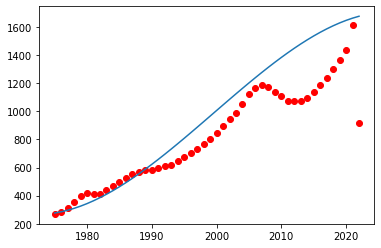

In [120]:
trad_poly = poly.transform(trad[['type', 'flavor', 'state', 'year']])
predicted = clf.predict(trad_poly)
plt.scatter(trad['year'], trad['index'], color='red')
plt.plot(trad['year'], predicted)